# Учебный проект по разведывательному анализу данных (EDA) для SkillFactory

## Цели и задачи проекта:

Провести разведывательный анализ данных, составить отчет и отобрать данные для построения модели, которая предсказывала бы результаты госэкзамена по математике для каждого ученика школы.

In [1]:
from scipy.stats import ttest_ind
from itertools import combinations
import math
import numpy as np
import seaborn as sns
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

pd.set_option('display.max_rows', 50)
pd.set_option('display.max_columns', 50)

stud = pd.read_csv('Data/stud_math.xls')

In [2]:
def find_outliers(column):
    
    """Поиск выбросов"""
    
    #Находим 25 и 75 персентиль и межквартильный размах
    perc25 = stud[column].quantile(0.25)
    perc75 = stud[column].quantile(0.75)
    iqr = perc75 - perc25
    #Находим верхнюю и нижнюю границу выбросов
    lower_bound = perc25 - 1.5*iqr
    upper_bound = perc75 + 1.5*iqr

    print(
        f"25th percentile: {perc25}, 75th percentile: {perc75}, IQR: {iqr}, Inner fences: [{lower_bound}, {upper_bound}]")
    #находим выбросы
    outliers = pd.DataFrame(stud.loc[stud[column] > upper_bound])
    outliers.append(stud.loc[stud[column] < lower_bound])
    display(outliers)
    #строим боксплот
    stud.boxplot(column=[column], figsize=(2, 10)) 
    plt.show()


def remove_outliers(column):
    
    """Удаление выбросов"""
    #Находим 25 и 75 персентиль и межквартильный размах
    perc25 = stud[column].quantile(0.25)
    perc75 = stud[column].quantile(0.75)
    iqr = perc75 - perc25
    #Находим верхнюю и нижнюю границу выбросов
    lower_bound = perc25 - 1.5*iqr
    upper_bound = perc75 + 1.5*iqr
    stud.drop(stud[stud[column] > upper_bound].index, inplace=True) #удаляем выбросы, больше верхней границы


def get_boxplot(column):
    
    """Строим график sns.boxplot для выбранных столбцов"""
    
    fig, ax = plt.subplots(figsize=(4, 2))
    sns.boxplot(x=column, y='score',
                data=stud.loc[stud.loc[:, column].isin(
                    stud.loc[:, column].value_counts().index[:10])],
                ax=ax)
    plt.xticks(rotation=45)
    ax.set_title('Boxplot for ' + column)
    plt.show()


def get_stat_dif(column):
    
    """Находим статистически значемые различия"""
    
    cols = stud.loc[:, column].value_counts().index[:]
    combinations_all = list(combinations(cols, 2))
    for comb in combinations_all:
        if ttest_ind(stud.loc[stud.loc[:, column] == comb[0], 'score'],
                     stud.loc[stud.loc[:, column] == comb[1], 'score']).pvalue \
                <= 0.05/len(combinations_all):  # Учли поправку Бонферони
            print('Найдены статистически значимые различия для колонки', column)
            break

## Первый взгляд на данные

In [3]:
stud.head(10)

,school,sex,age,address,famsize,Pstatus,Medu,Fedu,Mjob,Fjob,reason,guardian,traveltime,studytime,failures,schoolsup,famsup,paid,activities,nursery,"studytime, granular",higher,internet,romantic,famrel,freetime,goout,health,absences,score
0,GP,F,18,U,NaN,A,4.0,4.0,at_home,teacher,course,mother,2.0,2.0,0.0,yes,no,no,no,yes,-6.0,yes,NaN,no,4.0,3.0,4.0,3.0,6.0,30.0
1,GP,F,17,U,GT3,NaN,1.0,1.0,at_home,other,course,father,1.0,2.0,0.0,no,yes,no,no,no,-6.0,yes,yes,no,5.0,3.0,3.0,3.0,4.0,30.0
2,GP,F,15,U,LE3,T,1.0,1.0,at_home,other,other,mother,1.0,2.0,3.0,yes,no,NaN,no,yes,-6.0,yes,yes,NaN,4.0,3.0,2.0,3.0,10.0,50.0
3,GP,F,15,U,GT3,T,4.0,2.0,health,NaN,home,mother,1.0,3.0,0.0,no,yes,yes,yes,yes,-9.0,yes,yes,yes,3.0,2.0,2.0,5.0,2.0,75.0
4,GP,F,16,U,GT3,T,3.0,3.0,other,other,home,father,1.0,2.0,0.0,no,yes,yes,no,yes,-6.0,yes,no,no,4.0,3.0,2.0,5.0,4.0,50.0
5,GP,M,16,U,LE3,T,4.0,3.0,services,other,reputation,mother,1.0,2.0,0.0,no,yes,yes,yes,yes,-6.0,yes,yes,no,5.0,4.0,2.0,5.0,10.0,75.0
6,GP,M,16,NaN,LE3,T,2.0,2.0,other,other,home,mother,1.0,2.0,0.0,no,no,no,no,yes,-6.0,yes,yes,no,4.0,4.0,4.0,3.0,0.0,55.0
7,GP,F,17,U,GT3,A,4.0,4.0,other,teacher,home,mother,2.0,2.0,0.0,yes,yes,no,no,yes,-6.0,yes,no,no,4.0,1.0,4.0,1.0,6.0,30.0
8,GP,M,15,U,LE3,A,3.0,2.0,services,other,home,mother,1.0,2.0,0.0,no,yes,yes,no,yes,-6.0,yes,yes,no,NaN,2.0,2.0,1.0,0.0,95.0
9,GP,M,15,U,NaN,NaN,3.0,4.0,other,other,home,mother,1.0,2.0,0.0,no,yes,yes,yes,yes,-6.0,yes,yes,no,5.0,5.0,1.0,5.0,0.0,75.0


Для удобства изменим регистр названия столбцов, и переименуем столбец studytime, granular.
Этого столбца нет в тех. задании, вернемся к нему позже

In [4]:
stud.columns = stud.columns.str.lower()
stud.columns

Index(['school', 'sex', 'age', 'address', 'famsize', 'pstatus', 'medu', 'fedu',
       'mjob', 'fjob', 'reason', 'guardian', 'traveltime', 'studytime',
       'failures', 'schoolsup', 'famsup', 'paid', 'activities', 'nursery',
       'studytime, granular', 'higher', 'internet', 'romantic', 'famrel',
       'freetime', 'goout', 'health', 'absences', 'score'],
      dtype='object')

In [5]:
stud.rename(
    columns={'studytime, granular': 'studytime_granular'}, inplace=True)

In [6]:
stud.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 395 entries, 0 to 394
Data columns (total 30 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   school              395 non-null    object 
 1   sex                 395 non-null    object 
 2   age                 395 non-null    int64  
 3   address             378 non-null    object 
 4   famsize             368 non-null    object 
 5   pstatus             350 non-null    object 
 6   medu                392 non-null    float64
 7   fedu                371 non-null    float64
 8   mjob                376 non-null    object 
 9   fjob                359 non-null    object 
 10  reason              378 non-null    object 
 11  guardian            364 non-null    object 
 12  traveltime          367 non-null    float64
 13  studytime           388 non-null    float64
 14  failures            373 non-null    float64
 15  schoolsup           386 non-null    object 
 16  famsup  

In [7]:
stud.describe()

,age,medu,fedu,traveltime,studytime,failures,studytime_granular,famrel,freetime,goout,health,absences,score
count,395.000000,392.000000,371.000000,367.000000,388.000000,373.000000,388.000000,368.000000,384.000000,387.000000,380.000000,383.000000,389.000000
mean,16.696203,2.750000,2.614555,1.438692,2.038660,0.337802,-6.115979,3.937500,3.231771,3.105943,3.531579,7.279373,52.262211
std,1.276043,1.098127,2.228732,0.694181,0.842078,0.743135,2.526235,0.927277,0.993940,1.115896,1.396019,23.465197,22.919022
min,15.000000,0.000000,0.000000,1.000000,1.000000,0.000000,-12.000000,-1.000000,1.000000,1.000000,1.000000,0.000000,0.000000
25%,16.000000,2.000000,2.000000,1.000000,1.000000,0.000000,-6.000000,4.000000,3.000000,2.000000,3.000000,0.000000,40.000000
50%,17.000000,3.000000,2.000000,1.000000,2.000000,0.000000,-6.000000,4.000000,3.000000,3.000000,4.000000,4.000000,55.000000
75%,18.000000,4.000000,3.000000,2.000000,2.000000,0.000000,-3.000000,5.000000,4.000000,4.000000,5.000000,8.000000,70.000000
max,22.000000,4.000000,40.000000,4.000000,4.000000,3.000000,-3.000000,5.000000,5.000000,5.000000,5.000000,385.000000,100.000000


После первичного осмотра данных, видно что ключевой показатель 'score' имеет пустые значения, столбцы 'fedu', 'famrel', 'absences' имеют нетипичные значения

In [8]:
stud.loc[stud.score.isnull()] 

,school,sex,age,address,famsize,pstatus,medu,fedu,mjob,fjob,reason,guardian,traveltime,studytime,failures,schoolsup,famsup,paid,activities,nursery,studytime_granular,higher,internet,romantic,famrel,freetime,goout,health,absences,score
201,GP,F,16,U,GT3,T,2.0,3.0,other,other,reputation,mother,1.0,2.0,0.0,yes,yes,NaN,yes,yes,-6.0,yes,no,no,4.0,NaN,3.0,4.0,6.0,NaN
244,GP,F,18,U,GT3,T,2.0,1.0,other,other,course,other,2.0,3.0,0.0,no,yes,yes,no,no,-9.0,yes,yes,yes,4.0,4.0,4.0,3.0,0.0,NaN
270,GP,F,19,NaN,GT3,T,3.0,3.0,other,services,home,other,1.0,2.0,2.0,no,yes,yes,yes,yes,-6.0,yes,yes,no,4.0,3.0,5.0,5.0,NaN,NaN
283,GP,F,18,U,GT3,T,1.0,1.0,other,other,home,mother,2.0,2.0,0.0,yes,NaN,no,yes,yes,-6.0,yes,yes,no,5.0,NaN,4.0,4.0,4.0,NaN
312,GP,M,19,U,GT3,T,1.0,2.0,other,services,course,other,1.0,2.0,1.0,no,no,no,no,no,-6.0,yes,yes,no,4.0,5.0,NaN,4.0,3.0,NaN
350,MS,M,19,NaN,GT3,T,1.0,1.0,other,services,home,other,3.0,2.0,3.0,no,no,no,no,NaN,-6.0,yes,yes,no,5.0,4.0,4.0,2.0,8.0,NaN


In [9]:
stud.dropna(subset=['score'], inplace=True) #удалим пустые значения

count    389.000000
mean      52.262211
std       22.919022
min        0.000000
25%       40.000000
50%       55.000000
75%       70.000000
max      100.000000
Name: score, dtype: float64

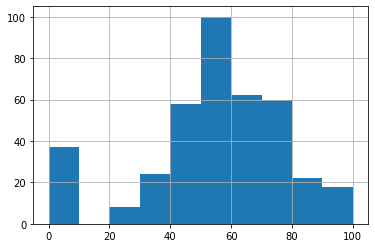

In [10]:
stud.score.hist()
stud.score.describe()

Как мы видим, юольшенство оценок расположились между 40 и 70, и есть некоторое количество оценок равных 0. Можем предположить что это либо неправильные данные, либо за 0 приняли оценку, котороя ниже 20 баллов.

In [11]:
stud = stud.loc[stud.score > 0] #удалим оценки равные 

Проверим столбцы 'fedu', 'absences', 'famrel', которые имеют нетипичные значения, на наличие выбросов

25th percentile: 2.0, 75th percentile: 3.0, IQR: 1.0, Inner fences: [0.5, 4.5]


,school,sex,age,address,famsize,pstatus,medu,fedu,mjob,fjob,reason,guardian,traveltime,studytime,failures,schoolsup,famsup,paid,activities,nursery,studytime_granular,higher,internet,romantic,famrel,freetime,goout,health,absences,score
11,GP,F,15,U,GT3,NaN,2.0,40.0,services,other,reputation,father,3.0,3.0,0.0,no,yes,no,yes,yes,-9.0,yes,yes,no,5.0,2.0,2.0,4.0,4.0,60.0


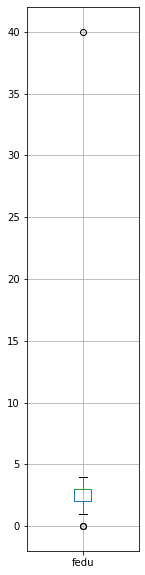

25th percentile: 2.0, 75th percentile: 8.0, IQR: 6.0, Inner fences: [-7.0, 17.0]


,school,sex,age,address,famsize,pstatus,medu,fedu,mjob,fjob,reason,guardian,traveltime,studytime,failures,schoolsup,famsup,paid,activities,nursery,studytime_granular,higher,internet,romantic,famrel,freetime,goout,health,absences,score
40,GP,F,16,U,LE3,T,2.0,2.0,other,other,home,mother,2.0,2.0,1.0,no,NaN,no,yes,no,-6.0,yes,yes,yes,3.0,3.0,3.0,3.0,25.0,55.0
74,GP,F,16,U,GT3,T,3.0,3.0,other,services,home,mother,1.0,2.0,0.0,yes,yes,yes,yes,yes,-6.0,yes,yes,no,4.0,NaN,3.0,5.0,54.0,55.0
89,GP,M,16,U,LE3,A,4.0,4.0,teacher,health,reputation,mother,1.0,2.0,0.0,no,yes,no,no,yes,-6.0,yes,no,no,4.0,1.0,NaN,5.0,18.0,35.0
103,GP,F,15,U,GT3,T,3.0,2.0,services,other,home,mother,2.0,2.0,0.0,yes,yes,yes,no,yes,-6.0,yes,yes,no,4.0,3.0,5.0,2.0,26.0,30.0
118,GP,M,17,R,GT3,T,1.0,3.0,other,NaN,course,father,3.0,2.0,1.0,no,yes,no,yes,yes,-6.0,yes,NaN,no,NaN,2.0,4.0,5.0,20.0,40.0
123,GP,M,16,U,GT3,T,4.0,4.0,health,other,course,mother,1.0,1.0,0.0,no,yes,no,yes,yes,-3.0,yes,yes,no,3.0,4.0,4.0,5.0,18.0,65.0
183,GP,F,17,U,LE3,NaN,3.0,3.0,other,other,reputation,mother,1.0,2.0,0.0,no,yes,no,yes,yes,-6.0,yes,yes,yes,5.0,3.0,3.0,1.0,56.0,40.0
198,GP,F,17,U,GT3,NaN,4.0,4.0,services,teacher,home,mother,2.0,1.0,1.0,no,yes,no,no,yes,-3.0,yes,NaN,no,4.0,2.0,4.0,2.0,24.0,90.0
203,GP,F,17,R,GT3,T,2.0,2.0,other,other,reputation,mother,1.0,1.0,0.0,no,yes,no,no,yes,-3.0,yes,yes,no,5.0,3.0,2.0,3.0,18.0,30.0
205,GP,F,17,U,GT3,T,3.0,4.0,at_home,services,home,mother,1.0,3.0,1.0,no,yes,yes,no,yes,-9.0,yes,yes,yes,4.0,4.0,3.0,5.0,28.0,45.0


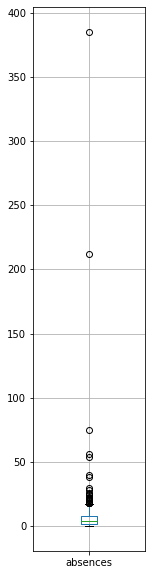

25th percentile: 4.0, 75th percentile: 5.0, IQR: 1.0, Inner fences: [2.5, 6.5]


,school,sex,age,address,famsize,pstatus,medu,fedu,mjob,fjob,reason,guardian,traveltime,studytime,failures,schoolsup,famsup,paid,activities,nursery,studytime_granular,higher,internet,romantic,famrel,freetime,goout,health,absences,score


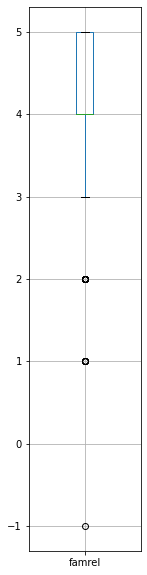

In [12]:
for col in ['fedu', 'absences', 'famrel']:
    find_outliers(col)

В столбце 'famrel' присутствует явный выброс '-1.0', очевидная опечатка, заменим на '1.0'. В столбцах 'fedu', 'absences' присутствуют значения, больше верхней границы выбросов, удалим эти значения.

In [13]:
stud.famrel = stud.famrel.apply(
    lambda x: float(str(x).replace('-1.0', '1.0')))

In [14]:
for col in ['fedu', 'absences']:
    remove_outliers(col)

Проверим какое количество пустых значений содержат столбцы

In [15]:
null_values = pd.DataFrame(stud.isnull().sum())
null_values['%'] = null_values/len(stud)*100
null_values

,0,%
school,0,0.000000
sex,0,0.000000
age,0,0.000000
address,14,4.320988
famsize,21,6.481481
pstatus,34,10.493827
medu,2,0.617284
fedu,19,5.864198
mjob,15,4.629630
fjob,29,8.950617


Количество пропущенных значений не значительно, и почти не превышает 10%, заменим в количественные пустые значения медианой

In [16]:
stud.fillna(stud.median(), inplace=True)

In [17]:
stud.corr()

,age,medu,fedu,traveltime,studytime,failures,studytime_granular,famrel,freetime,goout,health,absences,score
age,1.000000,-0.134092,-0.136415,0.105088,-0.000548,0.209265,0.000548,0.073283,0.018685,0.146752,-0.035225,0.190852,-0.137072
medu,-0.134092,1.000000,0.588286,-0.159470,0.093302,-0.215081,-0.093302,-0.004684,0.045909,0.054730,-0.040763,0.087770,0.192488
fedu,-0.136415,0.588286,1.000000,-0.157465,-0.002751,-0.288932,0.002751,-0.019080,0.014466,0.020624,0.009883,-0.015939,0.137054
traveltime,0.105088,-0.159470,-0.157465,1.000000,-0.104142,0.097404,0.104142,-0.030995,0.019188,0.046232,-0.015157,-0.046537,-0.076097
studytime,-0.000548,0.093302,-0.002751,-0.104142,1.000000,-0.157298,-1.000000,0.049562,-0.129329,-0.013621,-0.085037,-0.053574,0.141967
failures,0.209265,-0.215081,-0.288932,0.097404,-0.157298,1.000000,0.157298,-0.004960,0.112596,0.091246,0.080125,0.178783,-0.289092
studytime_granular,0.000548,-0.093302,0.002751,0.104142,-1.000000,0.157298,1.000000,-0.049562,0.129329,0.013621,0.085037,0.053574,-0.141967
famrel,0.073283,-0.004684,-0.019080,-0.030995,0.049562,-0.004960,-0.049562,1.000000,0.165145,0.040325,0.104560,-0.102657,0.059262
freetime,0.018685,0.045909,0.014466,0.019188,-0.129329,0.112596,0.129329,0.165145,1.000000,0.289460,0.067756,0.081085,-0.005925
goout,0.146752,0.054730,0.020624,0.046232,-0.013621,0.091246,0.013621,0.040325,0.289460,1.000000,0.000530,0.163820,-0.166589


Для построения модели возьмем данные, у которых коэффициент прямой и обратной коррелияции больше 0.1. Столбцы studytime и studytime_granular взаимосвязаны между собой, поэтому столбец studytime_granular мы не будем учитывать при построении модели.

Построим боксплоты для столбцов с номинальными значениями

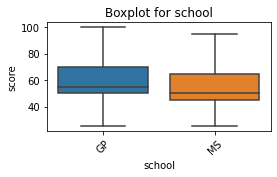

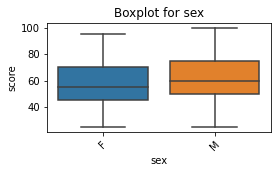

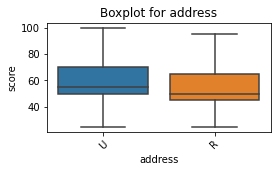

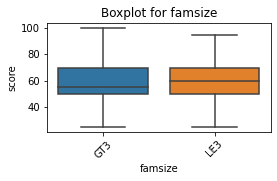

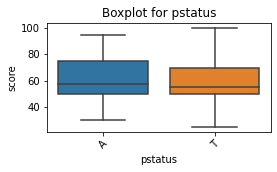

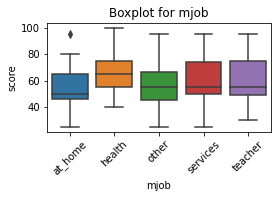

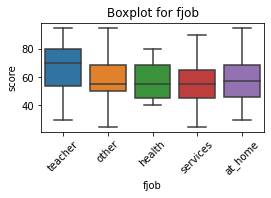

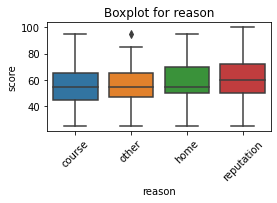

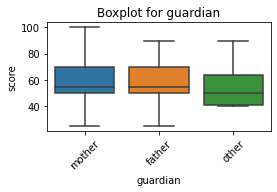

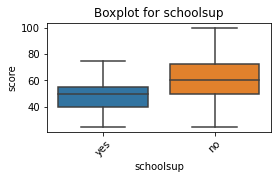

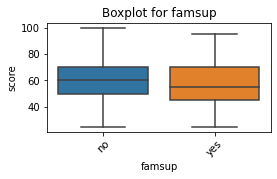

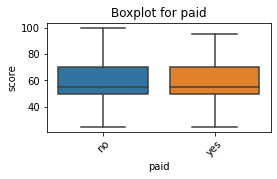

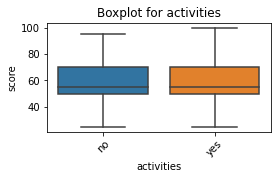

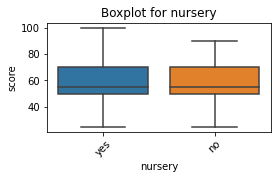

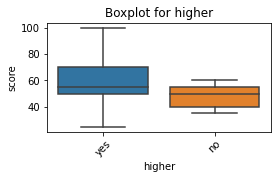

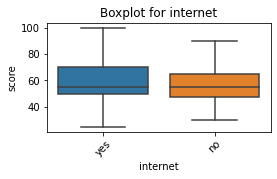

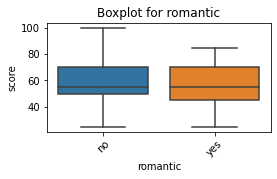

In [18]:
for col in ['school', 'sex', 'address', 'famsize', 'pstatus', 'mjob', 'fjob', 'reason', 'guardian', 'schoolsup',
            'famsup', 'paid', 'activities', 'nursery', 'higher', 'internet', 'romantic']:
    get_boxplot(col)

По графикам похоже, что параметры 'famsize', 'activities' и 'paid' не влияют на оценку. Проверим, есть ли статистическая разница в распределении оценок по номинативным признакам, с помощью теста Стьюдента.

In [19]:
for col in ['school', 'sex', 'address', 'famsize', 'pstatus', 'mjob', 'fjob', 'reason', 'guardian', 'schoolsup',
            'famsup', 'paid', 'activities', 'nursery', 'higher', 'internet', 'romantic']:
    get_stat_dif(col)

Найдены статистически значимые различия для колонки sex
Найдены статистически значимые различия для колонки address
Найдены статистически значимые различия для колонки mjob
Найдены статистически значимые различия для колонки schoolsup
Найдены статистически значимые различия для колонки higher


Как мы видим, серьёзно отличаются параметры: sex, address, mjob, schoolsup, и higher. Оставим эти переменные в датасете для дальнейшего построения модели.

В нашем случае важные переменные, которые, возможно, оказывают влияние на оценку, это: 'age', 'medu', 'fedu', 'studytime', 'failures', 'goout', 'absences', 'sex', 'address', 'mjob', 'schoolsup' и 'higher'.

In [20]:
stud_for_model = stud.loc[:, ['age', 'medu', 'fedu', 'studytime', 'failures', 'goout', 'absences', 'sex', 'address', 'mjob',
                              'schoolsup', 'higher', 'score']]
stud_for_model

,age,medu,fedu,studytime,failures,goout,absences,sex,address,mjob,schoolsup,higher,score
0,18,4.0,4.0,2.0,0.0,4.0,6.0,F,U,at_home,yes,yes,30.0
1,17,1.0,1.0,2.0,0.0,3.0,4.0,F,U,at_home,no,yes,30.0
2,15,1.0,1.0,2.0,3.0,2.0,10.0,F,U,at_home,yes,yes,50.0
3,15,4.0,2.0,3.0,0.0,2.0,2.0,F,U,health,no,yes,75.0
4,16,3.0,3.0,2.0,0.0,2.0,4.0,F,U,other,no,yes,50.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
388,18,3.0,1.0,2.0,0.0,4.0,0.0,F,U,teacher,no,yes,40.0
391,17,3.0,1.0,1.0,0.0,5.0,3.0,M,U,services,no,yes,80.0
392,21,1.0,1.0,1.0,3.0,3.0,3.0,M,R,other,NaN,NaN,35.0
393,18,3.0,2.0,1.0,0.0,1.0,0.0,M,R,services,no,yes,50.0


## Выводы

В результате EDA для выявления влияния условий жизни учащихся в возрасте от 15 до 22 лет на их успеваемость по математике, чтобы на ранней стадии выявлять студентов, находящихся в группе риска, были получены следующие выводы:

В данных достаточно мало пустых значений, максимальное количество пропусков было выявлено в столбцах pstatus и paid, и составляло 10.5% от общего количества значений в столбце.

Выбросы найдены только в столбцах fedu, famrel и absences, которые мы удалили или заменили.

Cамые важные параметры, которые предлагается использовать в дальнейшем для построения модели, это age, medu, fedu, studytime, failures, goout, absences, sex, address, mjob, schoolsup и higher.